# Testing our OMP code base
Just some basic unit testing to make sure things are working

In [50]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import omp

importlib.reload(omp)

%matplotlib inline

### Just make sure our raw arithmetic is implemented right

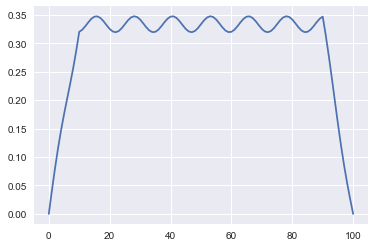

[array([ 0.1,  0.9])] [array([ 2.,  1.])]


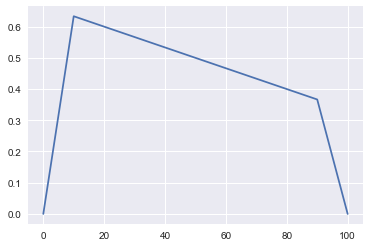

In [51]:
v = omp.Vector([[0.1, 0.9],[16]], [[1, 1],[0.5]], ['H1delta', 'H1sin'])
xs = np.arange(0,1.01,0.01)

plt.plot(v.evaluate(xs))
plt.show()

v1 = omp.Vector([[0.1]], [[1]], ['H1delta'])
v2 = omp.Vector([[0.9]], [[1]], ['H1delta'])

v3 = 2*v1 + 1*v2
print(v3.params, v3.coeffs)
plt.plot(v3.evaluate(xs))
plt.show()

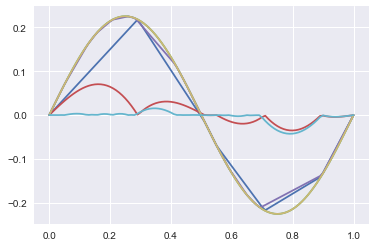

|| v ||	 1.0
||v_W_c||	 0.9159564625124854
||v_W_f||	 0.9691403856312072
||v - v_W_c||	 0.40127765796467374
||v - v_W_f||	 0.24650945811184413
<v_W_c, v_W_c>	 0.838976241218
<v_W_c, v_W_c> equivalent 0.838976241218
<v_W_f, v_W_f>	 0.939233087061
<v_W_f, v_W_f> equivalent 0.939233087061


In [52]:
np.random.seed(3)
n_c = 5
n_f = 20
W_c = omp.make_random_delta_basis(n_c)
W_f = omp.make_random_delta_basis(n_f)

v = omp.Vector([2],[1],['H1sin'])

v_W_c = W_c.project(v)
v_W_f = W_f.project(v)

#print(W.G)
plt.plot(xs, v_W_c.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_c).evaluate(xs))
plt.plot(xs, v_W_f.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_f).evaluate(xs))
plt.show()

print('|| v ||\t', v.norm())

print('||v_W_c||\t', v_W_c.norm())
print('||v_W_f||\t', v_W_f.norm())

print('||v - v_W_c||\t', (v - v_W_c).norm())
print('||v - v_W_f||\t', (v - v_W_f).norm())

print('<v_W_c, v_W_c>\t', v_W_c.dot(v_W_c))
print('<v_W_c, v_W_c> equivalent', (v_W_c.coeffs[0] * v.evaluate(v_W_c.params[0]) / np.sqrt(v_W_c.params[0] * (1 - v_W_c.params[0])) ).sum())
print('<v_W_f, v_W_f>\t', v_W_f.dot(v_W_f))
print('<v_W_f, v_W_f> equivalent', (v_W_f.coeffs[0] * v.evaluate(v_W_f.params[0]) / np.sqrt(v_W_f.params[0] * (1 - v_W_f.params[0])) ).sum())

### Now test the polynomial projections etc...

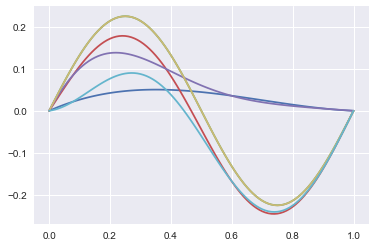

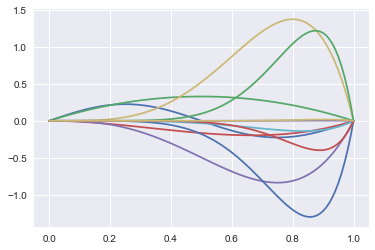

|| v ||	 1.0
||v_W_c||	 0.24946781945354227
||v_W_f||	 0.5262736301807349
||v - v_W_c||	 0.9683830889978896
||v - v_W_f||	 0.8503152745814326


/Users/james/projects/LJLL_2017/omp/omp.py:67: RuntimeWarning: divide by zero encountered in true_divide
  s = factorial(k) / factorial(k-2*l-1)


In [56]:
v = omp.Vector([2],[1],['H1sin'])

W_c = omp.Basis([omp.Vector([float(k)],[1.],['H1poly']) for k in range(2)])
W_f = omp.Basis([omp.Vector([float(k)],[1.],['H1poly']) for k in range(10)])

v_W_c = W_c.project(v)
v_W_f = W_f.project(v)

plt.plot(xs, v_W_c.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_c).evaluate(xs))
plt.plot(xs, v_W_f.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_f).evaluate(xs))
plt.show()

plt.plot(xs, v.evaluate(xs))
for p, c in zip(v_W_f.params[0], v_W_f.coeffs[0]):
    plt.plot(xs, omp.Vector([p], [c], ['H1poly']).evaluate(xs))
plt.show()

print('|| v ||\t', v.norm())

print('||v_W_c||\t', v_W_c.norm())
print('||v_W_f||\t', v_W_f.norm())

print('||v - v_W_c||\t', (v - v_W_c).norm())
print('||v - v_W_f||\t', (v - v_W_f).norm())

## So the basic mechanisms of the algorithm work, now to do some actual basis work
We start by looking at the orthonomalised basis and make sure things look right

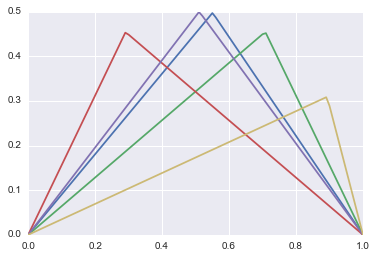

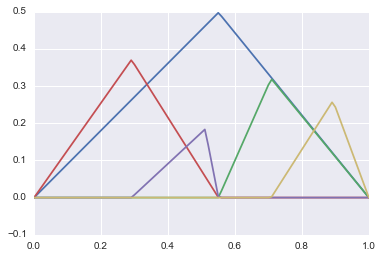

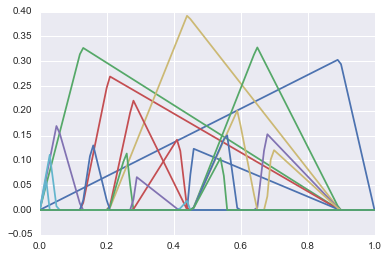

In [134]:
W_c_o = W_c.orthonormalise()
W_f_o = W_f.orthonormalise()

for vec in W_c.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

for vec in W_c_o.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

for vec in W_f_o.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### ...Well that looks about right. Now lets make a sinusoid basis, favourable basis pair, and check out the results

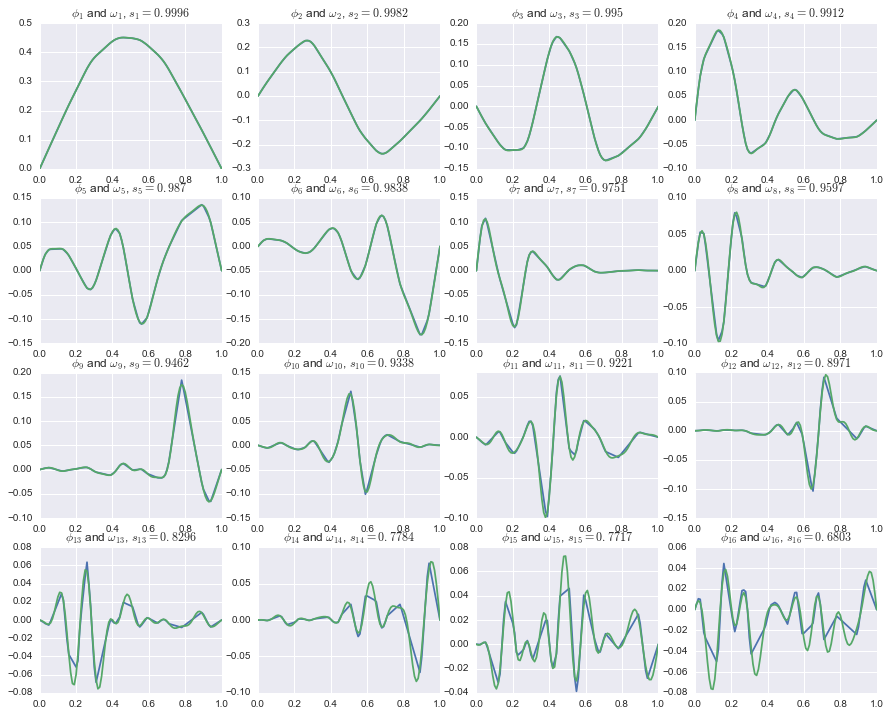

In [135]:
importlib.reload(omp)

np.random.seed(3)
n = 20
m = 30
Wm = omp.make_random_delta_basis(m)
Vn = omp.make_sin_basis(n)

Wm = Wm.orthonormalise()

BP = omp.BasisPair(Wm, Vn)
FB = BP.make_favorable_basis()

fig = plt.figure
fig = plt.figure(figsize=(15, 12))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.plot(xs, FB.Wm.vecs[i].evaluate(xs))
    ax.plot(xs, FB.Vn.vecs[i].evaluate(xs))
    ax.set(title=r'$\phi_{{{0}}}$ and $\omega_{{{1}}}$, $s_{{{2}}}={{{3:0.4}}}$'.format(i+1, i+1, i+1, FB.S[i]))

### Great, favorable basis code works. Now for some tests with the greedy algorithm.

In [136]:
importlib.reload(omp)

N = 1e4
dictionary = omp.make_unif_dictionary(N)

np.random.seed(3)
n = 20
m = 30
Vn = omp.make_sin_basis(n)

gbc = omp.GreedyBasisConstructor(m, dictionary, Vn)

Wm = gbc.construct_basis()

So where are the points? Have we got some heirarchical sort of system, perhaps following a dyadic grid. Hopefully we do!

In [137]:
for i in range(m):
    print('{0}:\t {1}'.format(i,Wm.vecs[i].params[0]))

0:	 [ 0.47605239]
1:	 [ 0.01909809]
2:	 [ 0.98160184]
3:	 [ 0.92810719]
4:	 [ 0.07109289]
5:	 [ 0.12328767]
6:	 [ 0.87771223]
7:	 [ 0.82611739]
8:	 [ 0.17258274]
9:	 [ 0.22417758]
10:	 [ 0.77712229]
11:	 [ 0.72552745]
12:	 [ 0.27247275]
13:	 [ 0.32456754]
14:	 [ 0.67733227]
15:	 [ 0.62523748]
16:	 [ 0.37146285]
17:	 [ 0.42485751]
18:	 [ 0.57854215]
19:	 [ 0.52494751]
20:	 [ 0.96750325]
21:	 [ 0.03289671]
22:	 [ 0.08459154]
23:	 [ 0.91490851]
24:	 [ 0.00839916]
25:	 [ 0.99190081]
26:	 [ 0.86481352]
27:	 [ 0.13578642]
28:	 [ 0.18528147]
29:	 [ 0.93920608]


In [82]:
importlib.reload(omp)

lp = np.array([0.4324, 0.894342, 0.112])
lc = np.array([0.4, 0.5, 1.0])

rp = np.array([0.5, 0.9])
rc = np.array([0.1, 0.2])

choice = np.greater.outer(lp, rp)
print(choice)
fu = np.outer(lp, 1.0 - rp)
fl = np.outer(1.0 - lp, rp)
print(fu)
print(fl)
c = 1. / np.sqrt((1. - rp) * rp)
print(c)
print(c * fu)
print(c * fl)
print(c * fu * choice + c * fl * ~choice)

print(omp.del_evaluate(lp, rp))

cl = 1. / np.sqrt((1. - lp) * lp)
print(cl[:,np.newaxis] * lc[:,np.newaxis] * rc * omp.del_evaluate(lp, rp))
print(omp.dot_element('H1delta', lp, lc, 'H1delta', rp, rc))

print('sin del tests')

lp = np.array([3, 4, 5])
lc = np.array([1,2,1])

print(rp, lp)
print(omp.sin_evaluate(rp, lp))
print(rc, lc)
print(c[:, np.newaxis] * lc * rc[:, np.newaxis] * omp.sin_evaluate(rp, lp) )

print(omp.dot_element('H1sin', lp, lc, 'H1delta', rp, rc))
print(omp.dot_element('H1delta', rp, rc, 'H1sin', lp, lc))

print('sin sin tests')
rp = np.array([4, 6])
rc = np.array([2, 1])
print(lc[:,np.newaxis] * rc * np.equal.outer(lp, rp))
print(omp.dot_element('H1sin', lp, lc, 'H1sin', rp, rc))

[[False False]
 [ True False]
 [False False]]
[[ 0.2162     0.04324  ]
 [ 0.447171   0.0894342]
 [ 0.056      0.0112   ]]
[[ 0.2838     0.51084  ]
 [ 0.052829   0.0950922]
 [ 0.444      0.7992   ]]
[ 2.          3.33333333]
[[ 0.4324      0.14413333]
 [ 0.894342    0.298114  ]
 [ 0.112       0.03733333]]
[[ 0.5676    1.7028  ]
 [ 0.105658  0.316974]
 [ 0.888     2.664   ]]
[[ 0.5676    1.7028  ]
 [ 0.894342  0.316974]
 [ 0.888     2.664   ]]
[[ 0.5676    1.7028  ]
 [ 0.894342  0.316974]
 [ 0.888     2.664   ]]
[[ 0.04582878  0.27497271]
 [ 0.14546906  0.10311471]
 [ 0.28157719  1.68946314]]
[[ 0.04582878  0.27497271]
 [ 0.14546906  0.10311471]
 [ 0.28157719  1.68946314]]
sin del tests
[ 0.5  0.9] [3 4 5]
[[ -1.50052719e-01  -2.75642374e-17   9.00316316e-02]
 [  1.21395200e-01  -1.07031462e-01   9.00316316e-02]]
[ 0.1  0.2] [1 2 1]
[[ -3.00105439e-02  -1.10256949e-17   1.80063263e-02]
 [  8.09301333e-02  -1.42708617e-01   6.00210877e-02]]
[[ -3.00105439e-02  -1.10256949e-17   1.80063263